In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import joblib



In [108]:
import sys
import os
sys.path.append(os.path.abspath("../scripts"))
try:
    from eda import ExplanatoryAnalysis
except:
    print("import error")

In [109]:
df_bnd = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw11\\Data\\BND_raw_data.csv')
df_spy = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw11\\Data\\SPY_raw_data.csv')
df_tsla = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw11\\Data\\TSLA_raw_data.csv')

In [110]:
bnd_eda = ExplanatoryAnalysis()
spy_eda = ExplanatoryAnalysis()
tsla_eda = ExplanatoryAnalysis()

In [111]:
df_bnd=bnd_eda.to_time(df_bnd, "BND")
df_spy=spy_eda.to_time(df_spy, "SPY")
df_tsla=tsla_eda.to_time(df_tsla, "TSLA")

In [112]:
df_tsla.head()

,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [6]:
train_size = int(0.8* len(df_tsla))
train_size

2028

In [7]:
df_tsla['Close_TSLA_Diff'] = df_tsla['Close_TSLA'].diff().dropna()
last_close = df_tsla['Close_TSLA'][train_size-1]

C:\Users\Aman\AppData\Local\Temp\ipykernel_5528\1861493119.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_close = df_tsla['Close_TSLA'][train_size-1]


In [8]:
# Train ARIMA on the differenced series
train_data = df_tsla["Close_TSLA_Diff"][:train_size]
test_data = df_tsla[["Close_TSLA"]][train_size:train_size+30]

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Select closing price & normalize it
scaler = MinMaxScaler(feature_range=(0,1))
df_tsla["Close_scaled"] = scaler.fit_transform(df_tsla[["Close_TSLA"]])

# Define lookback period (e.g., 60 days)
timesteps = 60  

# Prepare training data
X_train, y_train = [], []
for i in range(timesteps, len(df_tsla) - 30):  # Reserve last 30 days for forecasting
    X_train.append(df_tsla["Close_scaled"].values[i-timesteps:i])
    y_train.append(df_tsla["Close_scaled"].values[i])

X_train, y_train = np.array(X_train), np.array(y_train)




In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),  
    Dropout(0.2),  
    LSTM(units=30, return_sequences=False),
    Dropout(0.1),
    LSTM(units=15, return_sequences=False),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


c:\Users\Aman\Desktop\kifyaw11\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 0.0177
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0013
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 9.0296e-04
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 7.5588e-04
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 6.9644e-04
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 8.2027e-04
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 6.3437e-04
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 9.0264e-04
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 7.6966e-04
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 5.9971e-04
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 7.1715e-04
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.5818e-04
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 5.7743e-04
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 5.6514e-04
Epoch 15/50
77/77 ━━━━

In [11]:
# Prepare test data (last `timesteps` days)
test_df = df_tsla["Close_scaled"].values[-timesteps:].reshape(1, timesteps, 1)


In [99]:
x_test =test_df[0,:,]
y_test =df_tsla["Close_scaled"][-60:].values

In [71]:
loss = model.evaluate(x_test, y_test)
loss = scaler.inverse_transform([[loss]])
loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0115


array([[15.43038126]])

In [26]:
joblib.dump(model, 'lstm_model_loss(15).joblib')

['lstm_model_loss(15).joblib']

In [116]:
# Initialize input with last 60 days of actual data
test_input = df_tsla["Close_TSLA"].values[-60:]  
test_input = scaler.transform(test_input.reshape(-1, 1)).reshape(1, 60, 1)


c:\Users\Aman\Desktop\kifyaw11\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [117]:


forecast = []

for _ in range(180):  # Predict next 60 days
    pred = model.predict(test_input[0])  # Predict one day ahead
    forecast.append(pred[0, 0])  # Store prediction

    # Update input by appending the new prediction & removing the first value
    test_input = np.append(test_input[:, 1:, :], pred[0,0].reshape(1, 1, 1), axis=1)

# Convert predictions back to original scale
forecast_prices = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━

In [105]:
forecast_dates = pd.date_range(start="2025-02-01", periods=180, freq="D")


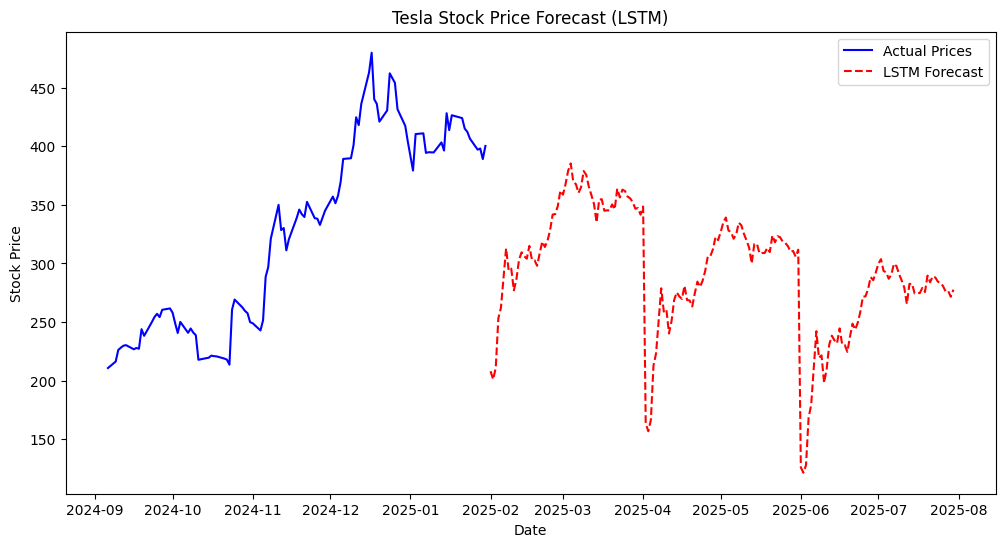

In [118]:
plt.figure(figsize=(12, 6))

# Plot actual prices (last 100 days before forecast)
plt.plot(df_tsla.index[-100:], df_tsla["Close_TSLA"].values[-100:], label="Actual Prices", color="blue")

# Plot forecasted prices
plt.plot(forecast_dates, forecast_prices, label="LSTM Forecast", color="red", linestyle="dashed")

plt.title("Tesla Stock Price Forecast (LSTM)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
